# Procesos Estocásticos HW 1

Este notebook está para acompañar al PDF.

- Apellidos: Sotillo del Horno
- Nombre: Iván
  

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import math

## Ejercicio 1

Illustrate the validity of the derivation by comparing the empirical distribution obtained in a simulation of the Poisson process and the theoretical distribution of P [N (t) = n] given by Eq. (4) for the values λ = 10, t = 2.


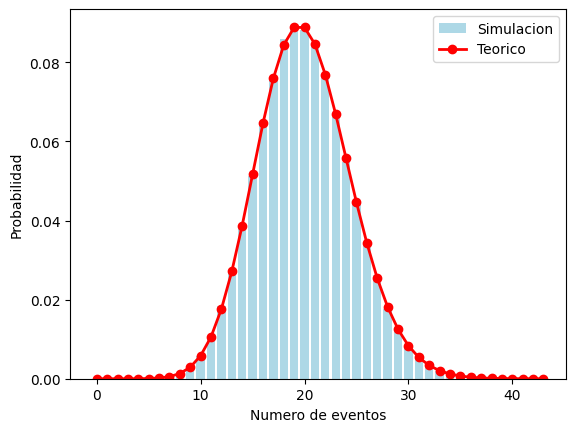

In [22]:
lam = 10
t = 2
N = 100000

# Simulacion
simulation = np.random.poisson(lam * t, N)

# Valores teoricos
n_values = np.arange(0, max(simulation) + 1)
theoretical = poisson.pmf(n_values, lam * t)

# Histograma
_ = plt.hist(simulation, bins=n_values - 0.5, density=True,
             rwidth=0.8, color='lightblue',  label='Simulacion')

# Grafico teorico
_ = plt.plot(n_values, theoretical, 'ro-', linewidth=2, label='Teorico')

plt.xlabel('Numero de eventos')
plt.ylabel('Probabilidad')
plt.legend()
plt.show()

## Ejercicio 2

Simulate a Poisson process with $λ = 5.0$. From these simulations show for diﬀerent values of $n = 1, 2, 5, 10$
that the probability density of the nth arrival is

$$f_{S_n}(t) = \frac{λ^n t^{n-1} e^{-λt}}{(n-1)!}$$

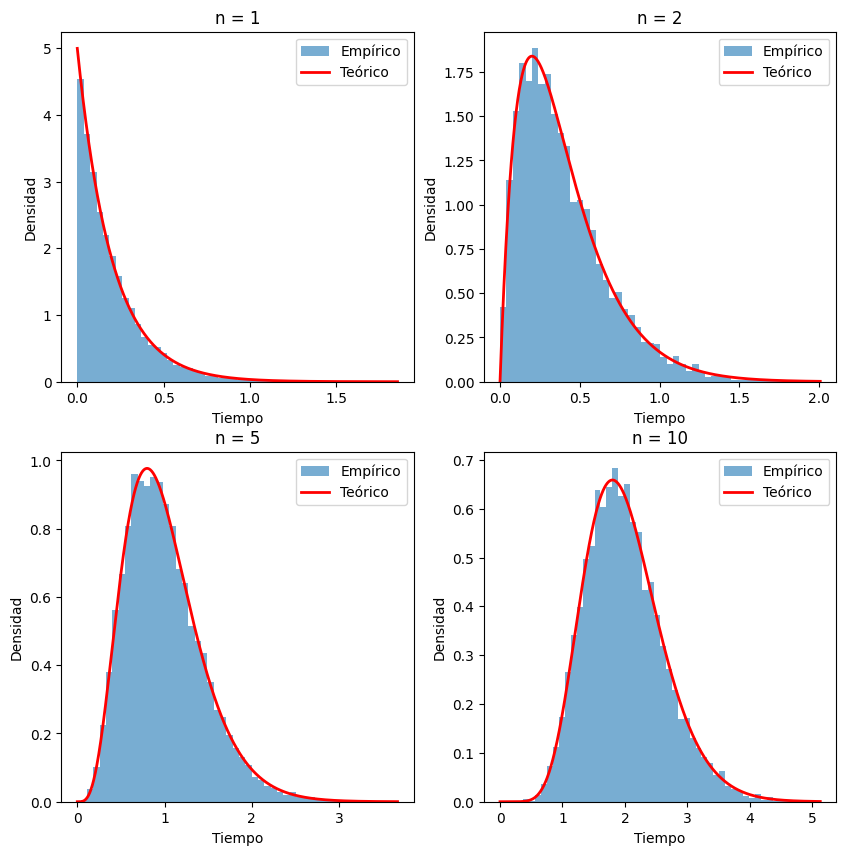

In [23]:
lam = 5.0
N = 10000
n_values = np.array([1, 2, 5, 10])

# Diccionario de los valores n-simos
event_times = {n: [] for n in n_values}

# Simulacion
for _ in range(N):
    interarrival_times = np.random.exponential(1 / lam, max(n_values))
    arrival_times = np.cumsum(interarrival_times)

    for n in n_values:
        event_times[n].append(arrival_times[n - 1])

# Histograma
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for i, n in enumerate(n_values):
    axs[i].hist(event_times[n], bins=50, density=True, alpha=0.6, label="Empírico")

    # Valores teoricos
    t_values = np.linspace(0, max(event_times[n]), 1000)
    theoretical_density = (lam ** n) * (t_values ** (n - 1)) * np.exp(-lam * t_values) / math.factorial(n - 1)

    axs[i].plot(t_values, theoretical_density, 'r-', linewidth=2, label="Teórico")
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel('Tiempo')
    axs[i].set_ylabel('Densidad')
    axs[i].legend()


## Ejercicio 4
Two teams $A$ and $B$ play a soccer match. The number of goals scored by Team $A$ is modeled by a Poisson process $N_A(t)$ with rate $λ_A = 0.02$ goals per minute. The number of goals scored by Team $B$ is modeled by a Poisson process $N_B(t)$ with rate $λ_B = 0.03$ goals per minute. The two processes are assumed to be independent. Let $N(t)$ be the total number of goals in the game up to and including time $t$. The game lasts for 90 minutes

In [24]:
# Parámetros
# Tasa de goles de A (goles/minuto)
lambda_A = 0.02
# Tasa de goles de B (goles/minuto)
lambda_B = 0.03
# Duración del partido en minutos
t_game = 90
# Número de partidos simulados
num_simulations = 1000000

In [25]:
# Inicialización de contadores
no_goals = 0
at_least_two = 0
A_1_B_2 = 0
draws = 0
B_first_goal = 0

for _ in range(num_simulations):
    # Simulamos tiempos de goles para A y B
    times_A = np.cumsum(np.random.exponential(1 / lambda_A, 100))
    times_B = np.cumsum(np.random.exponential(1 / lambda_B, 100))

    # Filtramos los goles dentro del tiempo del partido
    goals_A = times_A[times_A <= t_game]
    goals_B = times_B[times_B <= t_game]

    # Total de goles de cada equipo
    n_A = len(goals_A)
    n_B = len(goals_B)
    total_goals = n_A + n_B

    # 1. No se marcan goles
    if total_goals == 0:
        no_goals += 1

    # 2. Al menos 2 goles
    if total_goals >= 2:
        at_least_two += 1

    # 3. A:1, B:2
    if n_A == 1 and n_B == 2:
        A_1_B_2 += 1

    # 4. Empate
    if n_A == n_B:
        draws += 1

    # 5. B anota primero
    if n_B > 0 and (n_A == 0 or goals_B[0] < goals_A[0]):
        B_first_goal += 1

(a) Find the probability that no goals are scored.

Theory value: $0.011$

In [30]:
P_no_goals = no_goals / num_simulations

print(f'P(No se marcan goles) = {P_no_goals:.4f}')

P(No se marcan goles) = 0.0112


(b) Find the probability that at least two goals are scored in the game.

Theory value: $0.9839$

In [34]:
P_at_least_two = at_least_two / num_simulations

print(f'P(at least two goals) = {P_at_least_two}')

P(at least two goals) = 0.938796


(c) Find the probability of the final score being Team A:1,Team B:2

Theory value: $0.0729$

In [35]:
P_A_1_B_2 = A_1_B_2 / num_simulations

print(f'P(A:1, B:2) = {P_A_1_B_2:.4f}')

P(A:1, B:2) = 0.0730


(d) Find the probability that they draw.

Theory value: $0.1793$

In [36]:
P_draws = draws / num_simulations

print(f'P(draw) = {P_draws:.4f}')

P(draw) = 0.1800


(e) Find the probability that Team B scores the first goal.

Theory value: $0.5933$

In [37]:
P_B_first_goal = B_first_goal / num_simulations

print(f'P(B first goal) = {P_B_first_goal:.4f}')

P(B first goal) = 0.5935
